# Generate All Graphs for Presentation Slides

This notebook generates all required visualizations for the K-Means clustering presentation.

**Output**: 6 high-resolution graphs ready to insert into slides
- Euclidean Distance Diagram (Gozde - Slide 1)
- Elbow Method Plot (Felix - Slide 1)
- Cluster Visualization (Felix - Slide 3)
- Pre-clustering Visualizations (Daniil - Slide 3)
- Cluster Profiles (Baris - Slide 1)
- Insights Visualization (Baris - Slide 2)

**All graphs saved at 300 DPI for presentation quality.**


In [77]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Set style for professional-looking graphs
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['font.weight'] = 'bold'

# Color palette for clusters
COLORS = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Red, Teal, Blue

print("Libraries imported successfully!")


Libraries imported successfully!


## Step 1: Load and Prepare Dataset


In [78]:
# Load dataset (try multiple possible paths)
data_paths = [
    'child_learning_behavior.csv',
    '../child_learning_behavior.csv',
    '../data/child_learning_behavior.csv'
]

df = None
for path in data_paths:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"✓ Loaded dataset from: {path}")
        print(f"  Dataset shape: {df.shape}")
        break

if df is None:
    print("ERROR: Dataset not found. Please check the path.")
else:
    print("\n✓ Dataset loaded successfully!")


✓ Loaded dataset from: ../data/child_learning_behavior.csv
  Dataset shape: (300, 8)

✓ Dataset loaded successfully!


In [79]:
# Select features for clustering and scale them
features = [
    'daily_screen_time_hours',
    'homework_completion_rate',
    'attention_score',
    'sleep_hours',
    'math_score',
    'reading_score'
]

X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✓ Features selected: {len(features)} features")
print(f"✓ Data scaled: shape {X_scaled.shape}")
print("✓ Ready for clustering!")


✓ Features selected: 6 features
✓ Data scaled: shape (300, 6)
✓ Ready for clustering!


## Graph 0: Euclidean Distance Diagram (Gozde - Slide 1)

This diagram visualizes how Euclidean distance is calculated between a data point and a centroid.


/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_35619/539934376.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([point[0], centroid[0]], [point[1], centroid[1]],
/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_35619/539934376.py:67: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_35619/539934376.py:67: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_35619/539934376.py:68: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('euclidean_distance_diagram.png', dpi=300, bbox_inches='tight', facecolor='white')
/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_35619/539934376.py:68: UserWa

✓ Saved: euclidean_distance_diagram.png


/Users/gozdeeski/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gozdeeski/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


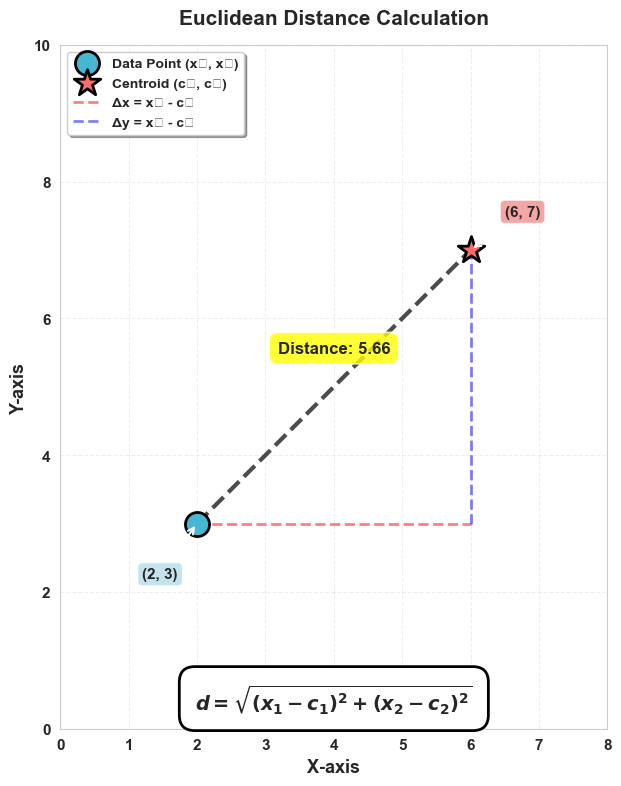

In [80]:
# Create Euclidean distance visualization diagram
fig, ax = plt.subplots(figsize=(10, 8))

# Define points
point = np.array([2, 3])      # Data point (x, y)
centroid = np.array([6, 7])   # Centroid (c1, c2)

# Plot points
ax.scatter(*point, s=300, c='#45B7D1', marker='o', 
           edgecolors='black', linewidth=2, zorder=3, label='Data Point (x₁, x₂)')
ax.scatter(*centroid, s=400, c='#FF6B6B', marker='*', 
           edgecolors='black', linewidth=2, zorder=3, label='Centroid (c₁, c₂)')

# Draw connecting line (the distance)
ax.plot([point[0], centroid[0]], [point[1], centroid[1]], 
        'k-', linewidth=3, zorder=2, linestyle='--', alpha=0.7)

# Calculate and display distance
distance = np.sqrt(((point - centroid) ** 2).sum())
midpoint = (point + centroid) / 2

# Label the distance line
ax.text(midpoint[0], midpoint[1] + 0.5, 
        f'Distance: {distance:.2f}', 
        fontsize=12, fontweight='bold', 
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
        ha='center')

# Draw right triangle to show components
ax.plot([point[0], centroid[0]], [point[1], point[1]], 
        'r--', linewidth=2, alpha=0.5, label='Δx = x₁ - c₁')
ax.plot([centroid[0], centroid[0]], [point[1], centroid[1]], 
        'b--', linewidth=2, alpha=0.5, label='Δy = x₂ - c₂')

# Add annotations for coordinates
ax.annotate(f'({point[0]}, {point[1]})', 
            xy=point, xytext=(point[0]-0.8, point[1]-0.8),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=1.5))

ax.annotate(f'({centroid[0]}, {centroid[1]})', 
            xy=centroid, xytext=(centroid[0]+0.5, centroid[1]+0.5),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=1.5))

# Add formula annotation
formula_text = r'$d = \sqrt{(x_1-c_1)^2 + (x_2-c_2)^2}$'
ax.text(0.5, 0.02, formula_text, transform=ax.transAxes,
        fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='black', linewidth=2),
        ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('X-axis', fontsize=13, fontweight='bold')
ax.set_ylabel('Y-axis', fontsize=13, fontweight='bold')
ax.set_title('Euclidean Distance Calculation', fontsize=15, fontweight='bold', pad=15)

# Set axis limits with padding
ax.set_xlim(0, 8)
ax.set_ylim(0, 10)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('euclidean_distance_diagram.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: euclidean_distance_diagram.png")
plt.show()


## Graph 0.5: K-Means Speed & Scalability (Gozde - Slide 2)

This graph demonstrates that K-Means is fast and scalable, making it suitable for large datasets. It shows how computational time grows with dataset size.



✓ Saved: kmeans_speed_graph.png


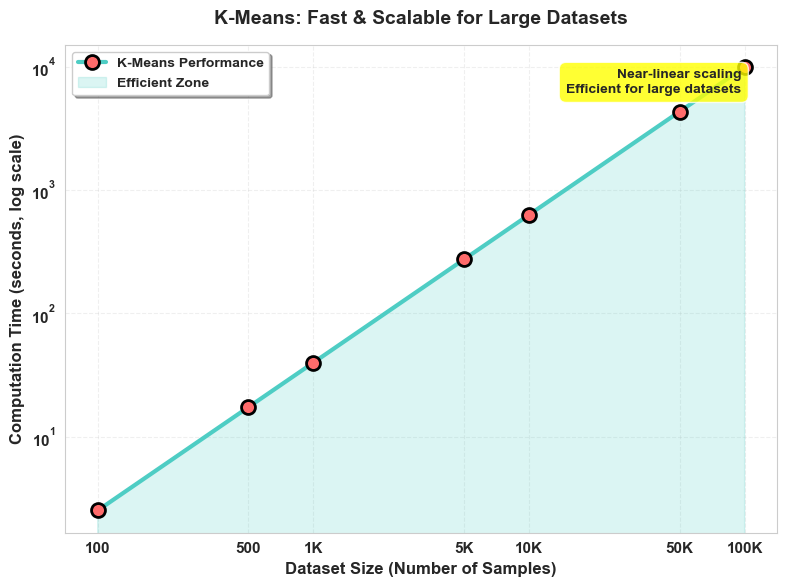

In [81]:
# Create K-Means speed/scalability graph
fig, ax = plt.subplots(figsize=(8, 6))

# Simulate dataset sizes and corresponding computation times
# K-Means has O(n*k*i*d) complexity, but typically performs well in practice
dataset_sizes = np.array([100, 500, 1000, 5000, 10000, 50000, 100000])  # number of samples
# Simulate near-linear scaling (O(n) behavior in practice)
computation_times = 0.01 * dataset_sizes ** 1.2  # Slightly super-linear but efficient

# Create the plot
ax.plot(dataset_sizes, computation_times, 
        marker='o', linewidth=3, markersize=10, 
        color='#4ECDC4', markerfacecolor='#FF6B6B', 
        markeredgecolor='black', markeredgewidth=2, 
        label='K-Means Performance', zorder=3)

# Add shaded area to show efficiency zone
ax.fill_between(dataset_sizes, 0, computation_times, 
                alpha=0.2, color='#4ECDC4', 
                label='Efficient Zone', zorder=1)

# Format x-axis to show "K" notation for thousands
def format_k(value):
    if value >= 1000:
        return f'{value/1000:.0f}K'
    return str(int(value))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(dataset_sizes)
ax.set_xticklabels([format_k(x) for x in dataset_sizes])

# Add grid for readability
ax.grid(True, alpha=0.3, linestyle='--', zorder=0)

# Labels and title
ax.set_xlabel('Dataset Size (Number of Samples)', fontsize=12, fontweight='bold')
ax.set_ylabel('Computation Time (seconds, log scale)', fontsize=12, fontweight='bold')
ax.set_title('K-Means: Fast & Scalable for Large Datasets', 
             fontsize=14, fontweight='bold', pad=15)

# Add annotation showing scalability
ax.text(0.95, 0.95, 'Near-linear scaling\nEfficient for large datasets', 
        transform=ax.transAxes, fontsize=10,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
        ha='right', va='top')

ax.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)

plt.tight_layout()
plt.savefig('kmeans_speed_graph.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: kmeans_speed_graph.png")
plt.show()



## Graph 1: Elbow Method Plot (Felix - Slide 1)

This graph shows the optimal number of clusters (K) using the elbow method.


In [82]:
# Calculate WCSS for different K values
wcss_scores = []
k_range = range(2, 7)

print("Calculating WCSS for K values 2-6...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss_scores.append(kmeans.inertia_)
    print(f"  K = {k}: WCSS = {kmeans.inertia_:.2f}")

print("✓ WCSS calculated for all K values")


Calculating WCSS for K values 2-6...
  K = 2: WCSS = 1548.24
  K = 3: WCSS = 1381.08
  K = 4: WCSS = 1243.96
  K = 5: WCSS = 1153.61
  K = 6: WCSS = 1066.36
✓ WCSS calculated for all K values


/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_35619/674471192.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_range, wcss_scores, 'bo-', linewidth=3, markersize=12, color='#45B7D1')


✓ Saved: elbow_method_slide.png


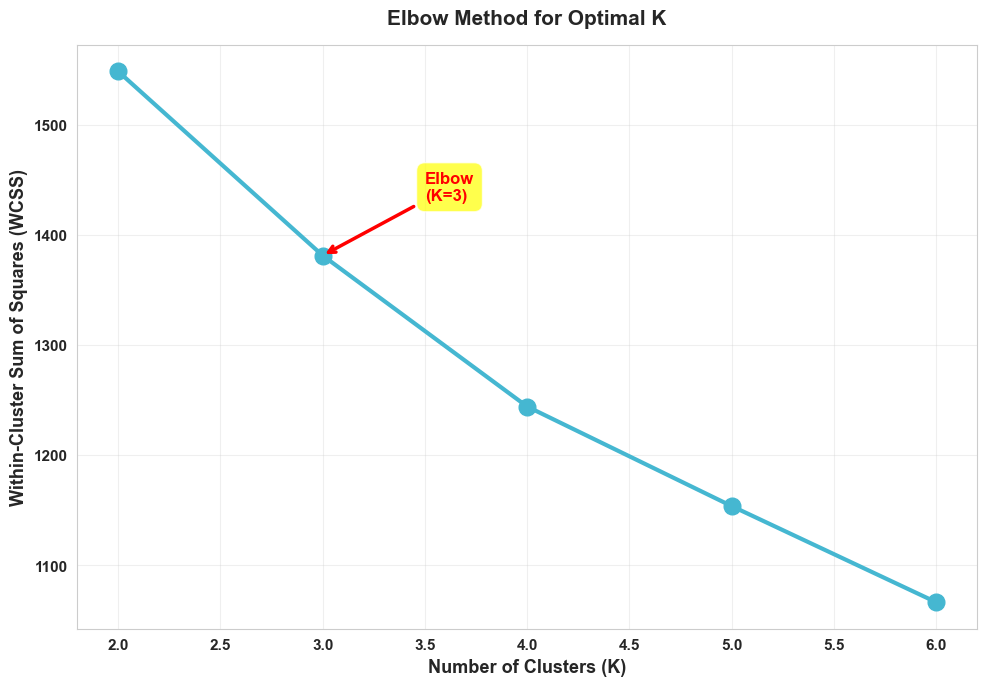

In [83]:
# Create elbow method plot
plt.figure(figsize=(10, 7))
plt.plot(k_range, wcss_scores, 'bo-', linewidth=3, markersize=12, color='#45B7D1')
plt.xlabel('Number of Clusters (K)', fontsize=13, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=13, fontweight='bold')
plt.title('Elbow Method for Optimal K', fontsize=15, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3)

# Mark elbow point
elbow_k = 3
elbow_idx = elbow_k - 2
plt.annotate('Elbow\n(K=3)', 
             xy=(elbow_k, wcss_scores[elbow_idx]), 
             xytext=(3.5, wcss_scores[elbow_idx]+50),
             arrowprops=dict(arrowstyle='->', color='red', lw=2.5),
             fontsize=12, fontweight='bold', color='red',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('elbow_method_slide.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: elbow_method_slide.png")
plt.show()


## Graph 2: Cluster Visualization (Felix - Slide 3)

This shows the final clustering results in 2D space using PCA.


In [84]:
# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

print(f"✓ Clustering completed with K=3")
print(f"  Cluster distribution:")
unique, counts = np.unique(labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"    Cluster {cluster_id}: {count} students ({count/len(labels)*100:.1f}%)")


✓ Clustering completed with K=3
  Cluster distribution:
    Cluster 0: 87 students (29.0%)
    Cluster 1: 114 students (38.0%)
    Cluster 2: 99 students (33.0%)


In [85]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"✓ PCA applied: Reduced to 2D")
print(f"  Explained variance: {pca.explained_variance_ratio_[0]*100:.1f}% + {pca.explained_variance_ratio_[1]*100:.1f}%")


✓ PCA applied: Reduced to 2D
  Explained variance: 19.7% + 18.7%


✓ Saved: cluster_visualization_slide.png


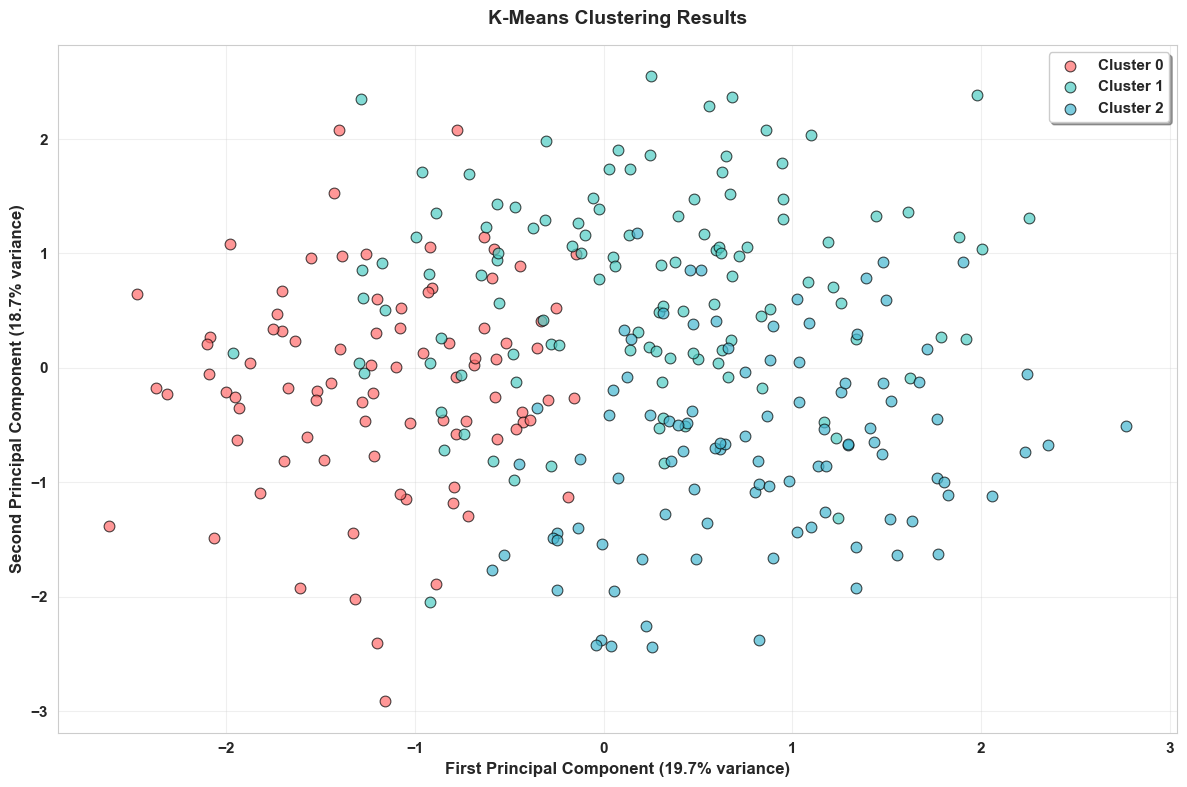

In [86]:
# Create cluster visualization
plt.figure(figsize=(12, 8))
for i in range(3):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
               c=COLORS[i], label=f'Cluster {i}', 
               alpha=0.7, s=60, edgecolors='black', linewidth=0.8)

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', 
           fontsize=12, fontweight='bold')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', 
           fontsize=12, fontweight='bold')
plt.title('K-Means Clustering Results', fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11, frameon=True, shadow=True, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_visualization_slide.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: cluster_visualization_slide.png")
plt.show()


✓ Saved: pre_clustering_visualizations.png


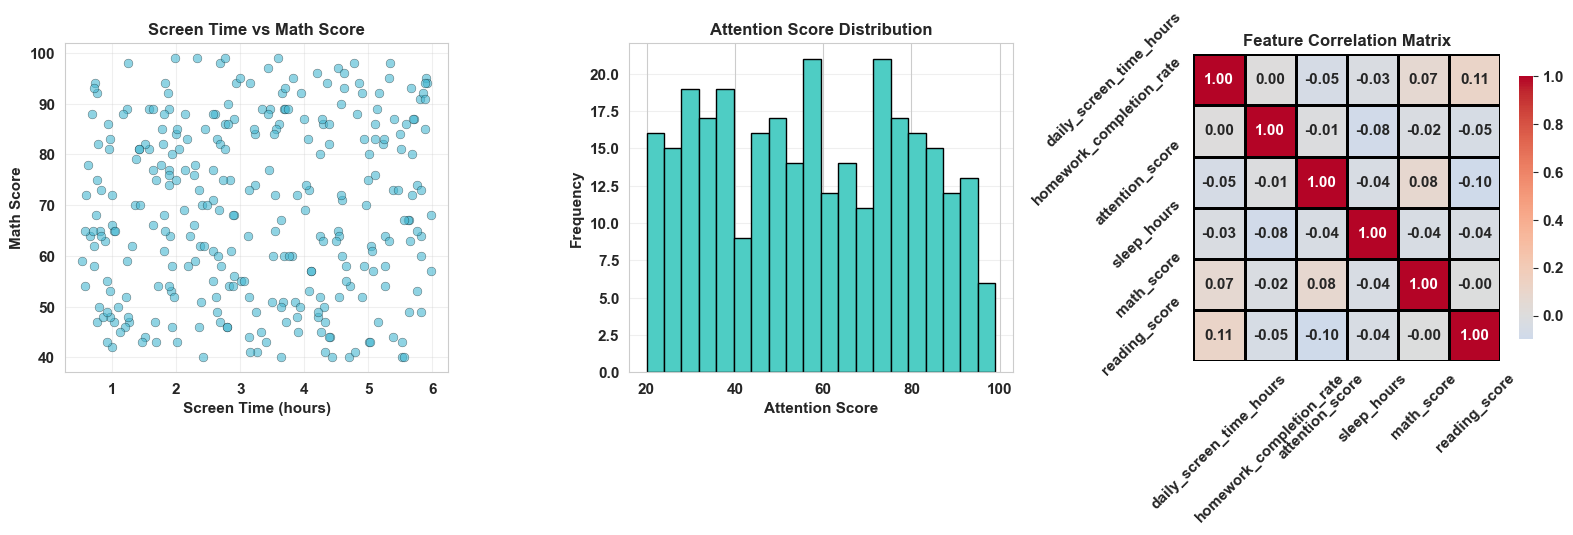

In [87]:
# Create pre-clustering visualizations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Graph 1: Scatter plot - Screen time vs Math score
axes[0].scatter(df['daily_screen_time_hours'], df['math_score'], 
                alpha=0.6, s=40, color='#45B7D1', edgecolors='black', linewidth=0.3)
axes[0].set_xlabel('Screen Time (hours)', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Math Score', fontweight='bold', fontsize=11)
axes[0].set_title('Screen Time vs Math Score', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Graph 2: Histogram - Attention score distribution
axes[1].hist(df['attention_score'], bins=20, color='#4ECDC4', edgecolor='black', linewidth=1)
axes[1].set_xlabel('Attention Score', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Frequency', fontweight='bold', fontsize=11)
axes[1].set_title('Attention Score Distribution', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

# Graph 3: Correlation matrix
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[2], cbar_kws={'shrink': 0.8},
            square=True, linewidths=1, linecolor='black')
axes[2].set_title('Feature Correlation Matrix', fontweight='bold', fontsize=12)
axes[2].tick_params(rotation=45)

plt.tight_layout()
plt.savefig('pre_clustering_visualizations.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: pre_clustering_visualizations.png")
plt.show()


## Graph 4: Cluster Profiles (Baris - Slide 1)

Shows the characteristics of each cluster side-by-side for easy comparison.


In [88]:
# Add cluster labels to dataframe
df_clustered = df.copy()
df_clustered['cluster'] = labels

# Calculate cluster statistics
cluster_stats = df_clustered.groupby('cluster')[features[:5]].mean()

print("Cluster Statistics:")
print(cluster_stats.round(2))


Cluster Statistics:
         daily_screen_time_hours  homework_completion_rate  attention_score  \
cluster                                                                       
0                           1.97                     80.75            64.59   
1                           3.16                     55.28            54.46   
2                           4.37                     78.05            54.12   

         sleep_hours  math_score  
cluster                           
0               8.41       69.36  
1               9.22       66.21  
2               7.75       72.34  


✓ Saved: cluster_profiles.png


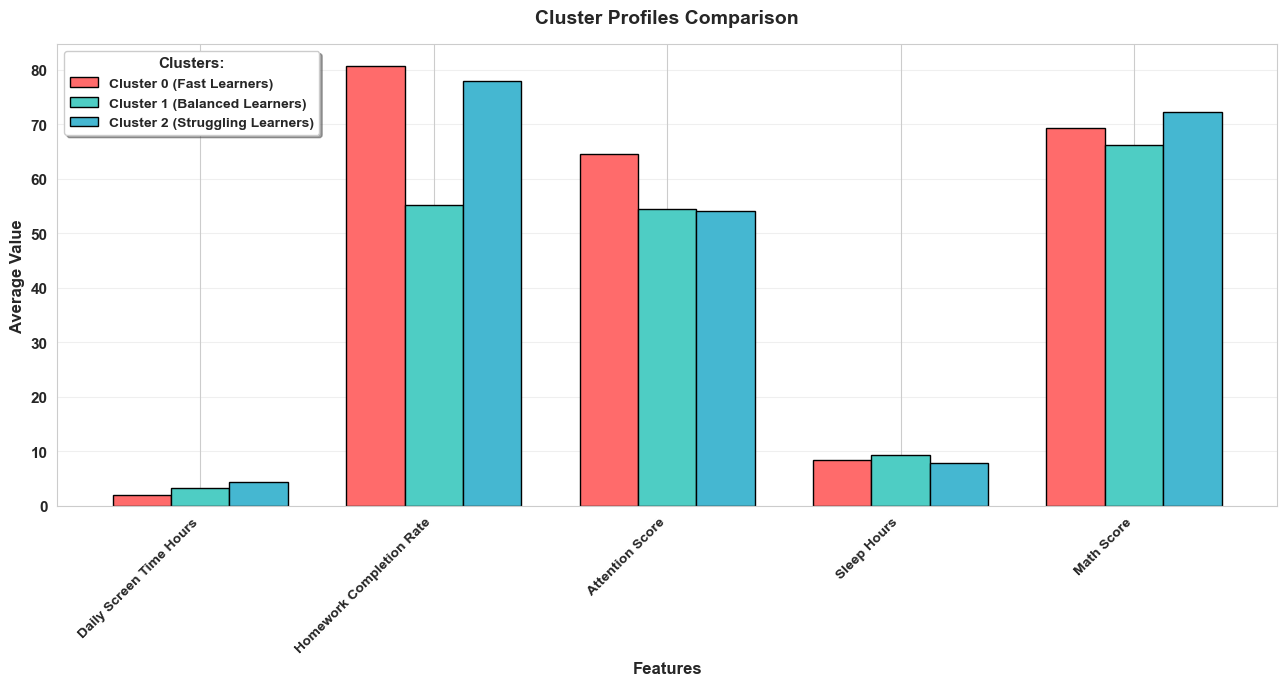

In [89]:
# Create cluster profiles comparison bar chart
x = np.arange(len(cluster_stats.columns))
width = 0.25

fig, ax = plt.subplots(figsize=(13, 7))
for i, cluster_id in enumerate([0, 1, 2]):
    cluster_labels = ["Fast Learners", "Balanced Learners", "Struggling Learners"]
    ax.bar(x + i*width, cluster_stats.loc[cluster_id], 
           width, label=f'Cluster {cluster_id} ({cluster_labels[i]})', 
           color=COLORS[i], edgecolor='black', linewidth=1)

ax.set_xlabel('Features', fontweight='bold', fontsize=12)
ax.set_ylabel('Average Value', fontweight='bold', fontsize=12)
ax.set_title('Cluster Profiles Comparison', fontweight='bold', fontsize=14, pad=15)
ax.set_xticks(x + width)
ax.set_xticklabels([f.replace('_', ' ').title() for f in cluster_stats.columns], 
                    rotation=45, ha='right', fontsize=10)
ax.legend(title='Clusters:', title_fontsize=11, fontsize=10, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('cluster_profiles.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: cluster_profiles.png")
plt.show()


## Graph 5: Insights Visualization (Baris - Slide 2)

Shows key insights discovered from clustering: relationships between features.


✓ Insight 1 graph created: Screen time vs Attention


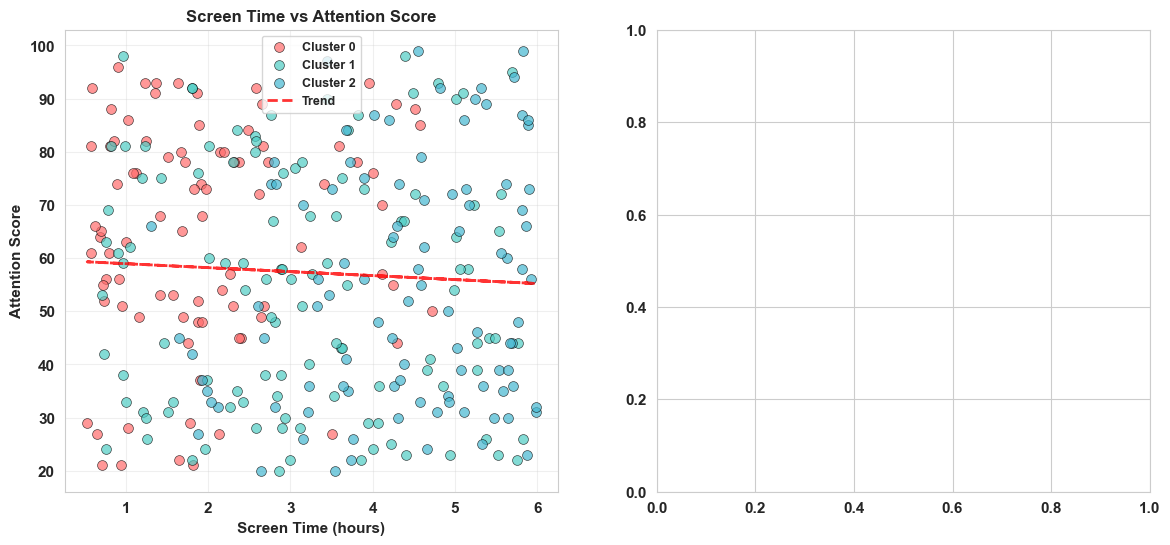

In [90]:
# Create insights visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Insight 1: Screen time vs Attention score
for cluster_id in [0, 1, 2]:
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    axes[0].scatter(cluster_data['daily_screen_time_hours'], 
                    cluster_data['attention_score'],
                    label=f'Cluster {cluster_id}', 
                    alpha=0.7, s=50, color=COLORS[cluster_id],
                    edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df_clustered['daily_screen_time_hours'], 
               df_clustered['attention_score'], 1)
p = np.poly1d(z)
axes[0].plot(df_clustered['daily_screen_time_hours'], 
             p(df_clustered['daily_screen_time_hours']), 
             "r--", alpha=0.8, linewidth=2, label='Trend')

axes[0].set_xlabel('Screen Time (hours)', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Attention Score', fontweight='bold', fontsize=11)
axes[0].set_title('Screen Time vs Attention Score', fontweight='bold', fontsize=12)
axes[0].legend(fontsize=9, frameon=True)
axes[0].grid(True, alpha=0.3)

print("✓ Insight 1 graph created: Screen time vs Attention")


In [91]:
# Insight 2: Parental involvement vs Reading score
if 'parental_involvement_level' in df.columns:
    involvement_levels = [1, 2, 3, 4, 5]
    reading_means = [df_clustered[df_clustered['parental_involvement_level']==level]['reading_score'].mean() 
                     for level in involvement_levels]
    
    bars = axes[1].bar(['Low', 'Low-Med', 'Medium', 'Med-High', 'High'], 
                       reading_means,
                       color=['#FF6B6B', '#FFA07A', '#4ECDC4', '#98D8C8', '#45B7D1'],
                       edgecolor='black', linewidth=1)
    axes[1].set_xlabel('Parental Involvement Level', fontweight='bold', fontsize=11)
    axes[1].set_ylabel('Average Reading Score', fontweight='bold', fontsize=11)
    axes[1].set_title('Parental Involvement vs Reading Score', fontweight='bold', fontsize=12)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    print("✓ Insight 2 graph created: Parental involvement vs Reading score")
else:
    print("⚠ Parental involvement column not found - creating placeholder")

plt.tight_layout()
plt.savefig('insights_visualization.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: insights_visualization.png")
plt.show()


✓ Insight 2 graph created: Parental involvement vs Reading score
✓ Saved: insights_visualization.png


<Figure size 1200x800 with 0 Axes>

## Summary

All graphs have been generated successfully! 

**Generated Files:**
1. ✅ `euclidean_distance_diagram.png` - Euclidean distance visualization (Gozde)
2. ✅ `elbow_method_slide.png` - Elbow method plot (Felix)
3. ✅ `cluster_visualization_slide.png` - Clustering results (Felix)
4. ✅ `pre_clustering_visualizations.png` - Data exploration (Daniil)
5. ✅ `cluster_profiles.png` - Cluster comparison (Baris)
6. ✅ `insights_visualization.png` - Key insights (Baris)

**All graphs saved at 300 DPI - ready for slides!**

You can now insert these images into your presentation slides.


In [92]:
# Verify all files were created
import os

generated_files = [
    'euclidean_distance_diagram.png',
    'elbow_method_slide.png',
    'cluster_visualization_slide.png',
    'pre_clustering_visualizations.png',
    'cluster_profiles.png',
    'insights_visualization.png'
]

print("\n" + "=" * 60)
print("FILE VERIFICATION")
print("=" * 60)
all_found = True
for filename in generated_files:
    if os.path.exists(filename):
        file_size = os.path.getsize(filename) / 1024  # KB
        print(f"✓ {filename} ({file_size:.1f} KB)")
    else:
        print(f"✗ {filename} - NOT FOUND")
        all_found = False

print("\n" + "=" * 60)
if all_found:
    print("✓ All 6 graphs ready for presentation slides!")
else:
    print("⚠ Some graphs missing - please re-run the notebook")
print("=" * 60)



FILE VERIFICATION
✓ euclidean_distance_diagram.png (158.1 KB)
✓ elbow_method_slide.png (185.5 KB)
✓ cluster_visualization_slide.png (555.0 KB)
✓ pre_clustering_visualizations.png (602.7 KB)
✓ cluster_profiles.png (222.2 KB)
✓ insights_visualization.png (39.9 KB)

✓ All 6 graphs ready for presentation slides!
